In [27]:
# INPUT_DATAPATH = "/home/karthikeya/ProjectsSJSU/ML_Project/Data" #path to store files based on search term
SEARCH_TERM = "Trump"
TWEETS_COUNT = 300
TIME_LIMIT = 5

 
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'

import os
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

dir_path = os.getcwd()
dir_path += "/Data/"

print(dir_path)

    


C:\sjsu-git\ML_Project/Data/


In [14]:
# Searches user_timeline, selects 10 tweets and puts that into dataframe
#later few parts of data we are interested in is fed into respective arrays
# mean length of tweets is calculated

tweets = api.user_timeline(screen_name=SEARCH_TERM, count=TWEETS_COUNT)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

print(dir(tweets[0]))

# We display the first 10 elements of the dataframe:
display(data.head(10))

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

display(data.head(10))

mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

Number of tweets extracted: 200.

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


,Tweets
0,#MothersDay is less than 3 weeks away! Shop ou...
1,We are delighted to announce our success at th...
2,Never has the arrival of spring been so welcom...
3,Can you spot @TrumpVancouver? The twisting tow...
4,Flashback to the opening of @TrumpGolfDubai th...
5,Windows ✔️ Drywall ✔️ Construction moving alon...
6,Honored to have all 3 of our U.S. Public Cours...
7,Test your game to the limits @TrumpGolf @Trump...
8,RT @TrumpRealty: Rare Opportunity!\n\nCurrentl...
9,#PropertyOfTheDay: Pristine 2-acre cul-de-sac ...


,Tweets,len,ID,Date,Source,Likes,RTs
0,#MothersDay is less than 3 weeks away! Shop ou...,139,989630612066758656,2018-04-26 22:21:39,Twitter Web Client,66,13
1,We are delighted to announce our success at th...,127,989145526674345985,2018-04-25 14:14:05,Twitter Web Client,204,38
2,Never has the arrival of spring been so welcom...,140,988875452508004354,2018-04-24 20:20:54,Twitter Web Client,124,24
3,Can you spot @TrumpVancouver? The twisting tow...,140,988780232416137218,2018-04-24 14:02:32,Twitter Web Client,1316,240
4,Flashback to the opening of @TrumpGolfDubai th...,140,987362290939977728,2018-04-20 16:08:09,Twitter Web Client,227,48
5,Windows ✔️ Drywall ✔️ Construction moving alon...,105,986990602519760896,2018-04-19 15:31:11,Twitter Ads,114,23
6,Honored to have all 3 of our U.S. Public Cours...,137,986599375949492224,2018-04-18 13:36:36,Twitter Web Client,851,181
7,Test your game to the limits @TrumpGolf @Trump...,94,986259994059341830,2018-04-17 15:08:01,Twitter Web Client,99,20
8,RT @TrumpRealty: Rare Opportunity!\n\nCurrentl...,140,985897501545914368,2018-04-16 15:07:36,Twitter Web Client,0,17
9,#PropertyOfTheDay: Pristine 2-acre cul-de-sac ...,137,984489950363176961,2018-04-12 17:54:29,Twitter Web Client,94,20


The lenght's average in tweets: 123.965


The tweet with more likes is: 
Happy Thanksgiving from all of us at 
The @Trump Organization! 🍁🦃🥐 https://t.co/UKTL4jhdLH
Number of likes: 12667
90 characters.

The tweet with more retweets is: 
RT @EricTrump: My thoughts and prayers are with the people of #LasVegas.
Number of retweets: 2899
72 characters.



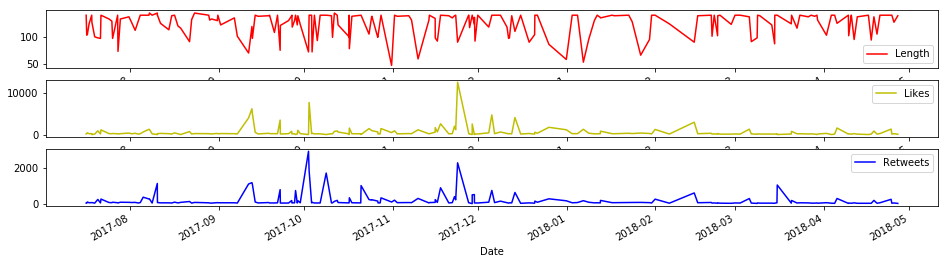

In [15]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])



%matplotlib inline
#plt.subplot(sharex=True, sharey=False)
plt.subplot(311)
tlen.plot(figsize=(16,4), label="Length", color='r', legend=True);
plt.subplot(312)
tfav.plot(figsize=(16,4), label="Likes", color='y', legend=True);
plt.subplot(313)
tret.plot(figsize=(16,4), label="Retweets", color='b', legend=True);




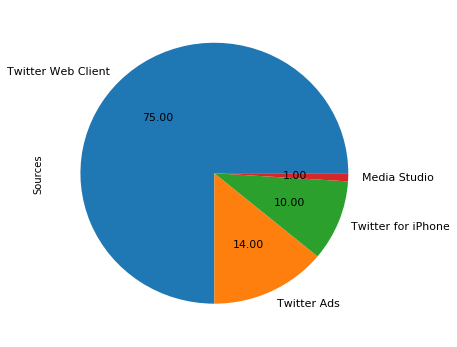

In [16]:

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)


percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [17]:
import re
from textblob import TextBlob


def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
    

# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,#MothersDay is less than 3 weeks away! Shop ou...,139,989630612066758656,2018-04-26 22:21:39,Twitter Web Client,66,13,1
1,We are delighted to announce our success at th...,127,989145526674345985,2018-04-25 14:14:05,Twitter Web Client,204,38,1
2,Never has the arrival of spring been so welcom...,140,988875452508004354,2018-04-24 20:20:54,Twitter Web Client,124,24,1
3,Can you spot @TrumpVancouver? The twisting tow...,140,988780232416137218,2018-04-24 14:02:32,Twitter Web Client,1316,240,0
4,Flashback to the opening of @TrumpGolfDubai th...,140,987362290939977728,2018-04-20 16:08:09,Twitter Web Client,227,48,-1
5,Windows ✔️ Drywall ✔️ Construction moving alon...,105,986990602519760896,2018-04-19 15:31:11,Twitter Ads,114,23,1
6,Honored to have all 3 of our U.S. Public Cours...,137,986599375949492224,2018-04-18 13:36:36,Twitter Web Client,851,181,1
7,Test your game to the limits @TrumpGolf @Trump...,94,986259994059341830,2018-04-17 15:08:01,Twitter Web Client,99,20,-1
8,RT @TrumpRealty: Rare Opportunity!\n\nCurrentl...,140,985897501545914368,2018-04-16 15:07:36,Twitter Web Client,0,17,1
9,#PropertyOfTheDay: Pristine 2-acre cul-de-sac ...,137,984489950363176961,2018-04-12 17:54:29,Twitter Web Client,94,20,0


Percentage of positive tweets: 61.5%
Percentage of neutral tweets: 29.5%
Percentage de negative tweets: 9.0%


In [27]:
# Before running this code
# make a directory named Data and provide the path of the directory at INPUT_DATAPATH
# set SEARCH_TERM as what you would like to search from twitter "ex: apple"
# which would produce the list of tweets for the term "apple" 
# and also store the twitter data into the file stream_apple.json in the directory of INPUT_DATAPATH


from tweepy import Stream
from tweepy.streaming import StreamListener
import time
import string
import json
import time
import os


class MyListener(StreamListener):
    """Custom StreamListener for streaming data."""

    def __init__(self, data_dir, query, time_limit):
        query_fname = ''.join(convert_valid(one_char) for one_char in query)
        self.start_time = time.time()
        self.limit = TIME_LIMIT
        self.outfile = "%s/stream_%s.json" % (data_dir, query_fname)
        
    def on_data(self, data):
      # removes if a file already exists with same name and creates new file and writes into that
    
        if os.path.exists(self.outfile): os.remove(self.outfile)
        with open(self.outfile,'a') as f:
            try:
                f.writelines(data)
                print(data)

                if (time.time() - self.start_time) > self.limit:
                    #f.write('WRITE COMPLETE')
                    print('WRITE COMPLETE')
                    time.sleep(1)
                    f.close()
                    return False
                return True

            except BaseException as e:
                print("Error on_data: %s" % str(e))
                time.sleep(5)


    def on_error(self, status):
        print(status)
        return True

    
def convert_valid(one_char):
    """Convert a character into '_' if invalid.
    Arguments:
        one_char -- the char to convert
    Return:
        Character -- converted char
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'
 
'''
def format_filename(fname):
    """Convert file name into a safe string.
    Arguments:
        fname -- the file name to convert
    Return:
        String -- converted file name
    """
    return ''.join(convert_valid(one_char) for one_char in fname)
'''

'''
@classmethod
def parse(cls, api, raw):
    status = cls.first_parse(api, raw)
    setattr(status, 'json', json.dumps(raw))
    return status
'''

"\n@classmethod\ndef parse(cls, api, raw):\n    status = cls.first_parse(api, raw)\n    setattr(status, 'json', json.dumps(raw))\n    return status\n"

In [28]:
twitter_stream = Stream(auth, MyListener(dir_path, SEARCH_TERM, TIME_LIMIT)) #calling stream function to stream in live data
twitter_stream.filter(track=[SEARCH_TERM]) # filters data based on search term on storing

{"created_at":"Sat Apr 28 02:08:23 +0000 2018","id":990050062355988480,"id_str":"990050062355988480","text":"RT @realDonaldTrump: Just Out: House Intelligence Committee Report released. \u201cNo evidence\u201d that the Trump Campaign \u201ccolluded, coordinated o\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":278396893,"id_str":"278396893","name":"Michael Graham","screen_name":"myst1967","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":68,"friends_count":95,"listed_count":0,"favourites_count":1282,"statuses_count":1509,"created_at":"Thu Apr 07 05:56:20 +0000 2011","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contributors_enable

{"created_at":"Sat Apr 28 02:08:24 +0000 2018","id":990050063656173568,"id_str":"990050063656173568","text":"RT @ProudResister: BREAKING: The Russian lawyer who met with @DonaldJTrumpJr and senior advisors of the Trump campaign just admitted that s\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2228403456,"id_str":"2228403456","name":"ellen #BanAssaultWeaponsNOW","screen_name":"elleninthewest","location":"Seattle, WA","url":null,"description":"Angry Nana, #Resist #TrumpIsTreason #NRABloodMoney  fighting 4 decency, dignity, truth, justice for ALL. DACA, Human, Animal Rights, Climate chg #TrumpIsTreason","translator_type":"none","protected":false,"verified":false,"followers_count":1336,"friends_count":2381,"listed_count":2,"favourites_count":489

{"created_at":"Sat Apr 28 02:08:24 +0000 2018","id":990050064465723393,"id_str":"990050064465723393","text":"RT @RepSwalwell: Confirmed: @DonaldJTrumpJr met with a Russian spy at Trump Tower. https:\/\/t.co\/fOq1LliuxR","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":3537680597,"id_str":"3537680597","name":"hellene robins","screen_name":"HelleneRobins","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":28,"friends_count":108,"listed_count":2,"favourites_count":13384,"statuses_count":4842,"created_at":"Thu Sep 03 20:53:05 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_backg

{"created_at":"Sat Apr 28 02:08:24 +0000 2018","id":990050065116024833,"id_str":"990050065116024833","text":"Trump deserves the nobel peace prize https:\/\/t.co\/ZusDF60fnY","display_text_range":[0,36],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":1194191780,"id_str":"1194191780","name":"coho77","screen_name":"MCohorst77","location":null,"url":null,"description":"Proud American \ud83c\uddfa\ud83c\uddf8 Never politically correct \ud83d\ude02pro 2A\ud83d\udd2b pro life #alwaysTrump \ud83d\udc4a\ud83c\udffb support our troops so tired of \u2744\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":419,"friends_count":266,"listed_count":7,"favourites_count":17417,"statuses_count":18890,"created_at":"Mon F

{"limit":{"track":1,"timestamp_ms":"1524881304978"}}

{"created_at":"Sat Apr 28 02:08:24 +0000 2018","id":990050066638495745,"id_str":"990050066638495745","text":"RT @johnlegend: I know fact free thought is a major pillar of maga but here's a little chart showing how black unemployment went down drama\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":765029708,"id_str":"765029708","name":"Kristine Blaylock","screen_name":"kblaylock12","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":122,"friends_count":118,"listed_count":0,"favourites_count":3355,"statuses_count":2452,"created_at":"Sat Aug 18 04:07:30 +0000 2012","utc_offset":null,"time_zone":null,"geo_en

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050067548594177,"id_str":"990050067548594177","text":"@NorthernOhioREO I've always been a Democrat but I have voted for Republicans for various reasons.  Never again.  I\u2026 https:\/\/t.co\/UG44EqP8OE","display_text_range":[17,140],"source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":989990079664934912,"in_reply_to_status_id_str":"989990079664934912","in_reply_to_user_id":1184331950,"in_reply_to_user_id_str":"1184331950","in_reply_to_screen_name":"NorthernOhioREO","user":{"id":899074765909929984,"id_str":"899074765909929984","name":"Gidget\u2019s Secret Society","screen_name":"ClaireTenSeven","location":"Joshua Tree CA","url":null,"description":"Retired Firefighter. Former USAFR Aerial Port. Aspiring surfer. Chihuahua momma. Democrat.  INFJ-T.  American Girl. I like Steve Buscemi. #MarchForOurLives","translator_type":"none","protected":fa

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050068362334208,"id_str":"990050068362334208","text":"RT @McFaul: I know a lot about how Moscow works. And there is no way , in my estimation, that Veselnitskya is sent to Trump Tower to offer\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2190334998,"id_str":"2190334998","name":"boandsunny","screen_name":"boandsunny","location":"boandsunny","url":null,"description":"Progressive Democrat #UniteBlue #ImWithHer","translator_type":"none","protected":false,"verified":false,"followers_count":7622,"friends_count":7308,"listed_count":214,"favourites_count":83272,"statuses_count":172769,"created_at":"Tue Nov 12 13:19:24 +0000 2013","utc_offset":null,"time_zone":null,"geo_enabled"

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050069520019458,"id_str":"990050069520019458","text":"RT @TheJordanRachel: You can look high and low and near and far and under and over AND YOU WILL NEVER find Trump-Russia collusion. THERE IS\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":202663084,"id_str":"202663084","name":"Charles Roller","screen_name":"charlie91b","location":"NC","url":null,"description":"Disabled Iraq War Army Vet Served 1985-88 and 2003-13. DIEHARD Conservative\/ Texan transplanted in NC\/ Freedom is not free.  Not looking for a relationship.","translator_type":"none","protected":false,"verified":false,"followers_count":5669,"friends_count":5325,"listed_count":46,"favourites_count":8296,"status

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050070241464320,"id_str":"990050070241464320","text":"RT @realDonaldTrump: House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been s\u2026","source":"\u003ca href=\"https:\/\/mobile.twitter.com\" rel=\"nofollow\"\u003eTwitter Lite\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4499577253,"id_str":"4499577253","name":"Some Israelites","screen_name":"Slaric6969","location":"Your mom's house","url":null,"description":"Love to see Isreal in peaces","translator_type":"none","protected":false,"verified":false,"followers_count":89,"friends_count":152,"listed_count":0,"favourites_count":3867,"statuses_count":3761,"created_at":"Tue Dec 08 18:55:48 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":false,"lang":"en","contri

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050070996377608,"id_str":"990050070996377608","text":"@realDonaldTrump Hm. Why didn't the HPSCI investigate this?\n\nhttps:\/\/t.co\/ozX4ZkotnS","display_text_range":[17,84],"source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":990049088375836672,"in_reply_to_status_id_str":"990049088375836672","in_reply_to_user_id":25073877,"in_reply_to_user_id_str":"25073877","in_reply_to_screen_name":"realDonaldTrump","user":{"id":943667843115241472,"id_str":"943667843115241472","name":"Chris","screen_name":"chrissumego","location":"\ud83c\uddfa\ud83c\uddf8","url":null,"description":"Area man","translator_type":"none","protected":false,"verified":false,"followers_count":40,"friends_count":104,"listed_count":0,"favourites_count":5823,"statuses_count":1041,"created_at":"Thu Dec 21 02:22:01 +0000 2017","utc_offset":null,"time_zone":null,"geo_enabled":false,

{"created_at":"Sat Apr 28 02:08:25 +0000 2018","id":990050071516536833,"id_str":"990050071516536833","text":"RT @kwilli1046: It Appears that Making America Great Again (#MAGA) Wasn't Enough. Trump Just Helped Make Asia Great Again and The World Wil\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":804026070844526594,"id_str":"804026070844526594","name":"Rick642","screen_name":"Rick_642","location":"Grand Rapids, MI","url":null,"description":"Conservative, God, Family, Constitution","translator_type":"none","protected":false,"verified":false,"followers_count":1714,"friends_count":2118,"listed_count":8,"favourites_count":16945,"statuses_count":23738,"created_at":"Wed Nov 30 18:15:28 +0000 2016","utc_offset":null,"time_zone":null,"

{"created_at":"Sat Apr 28 02:08:26 +0000 2018","id":990050073018019841,"id_str":"990050073018019841","text":"RT @2soulsonfire: Kanye showed his true colors when he interrupted Taylor Swift at the VMAs, when he discredited over 50 women by saying Bi\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":4721921953,"id_str":"4721921953","name":"bri \ud83c\udf19","screen_name":"__miralaluna","location":"Wakanda","url":null,"description":"If the law is of such a nature that it requires you to be an agent of injustice to another, then, I say, break the law.","translator_type":"regular","protected":false,"verified":false,"followers_count":568,"friends_count":112,"listed_count":42,"favourites_count":64914,"statuses_count":140975,"created_

{"created_at":"Sat Apr 28 02:08:26 +0000 2018","id":990050073911308288,"id_str":"990050073911308288","text":"@MCHduh @JohnnyRox12 @DavidNakamura @maggieNYT @agearan So you focused on his words (tweets) but completely missed\u2026 https:\/\/t.co\/d7K10RFeSG","display_text_range":[56,140],"source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":990047264553996288,"in_reply_to_status_id_str":"990047264553996288","in_reply_to_user_id":319288784,"in_reply_to_user_id_str":"319288784","in_reply_to_screen_name":"MCHduh","user":{"id":1209684721,"id_str":"1209684721","name":"John\/TheCitySquare","screen_name":"johncitysq","location":"SF Bay Area","url":"http:\/\/thecitysquare.blogspot.com\/","description":"Advocate of freedom \u2022 Constitutional rights \u2022 Limited government \u2022 Free market economics \u2022 #1A \u2022 #2A \u2022 #DrainTheSwamp \u2022 #MAGA","translator_type":"none","protected":false,

{"created_at":"Sat Apr 28 02:08:26 +0000 2018","id":990050074846793728,"id_str":"990050074846793728","text":"RT @realDonaldTrump: House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been s\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":917265538363150336,"id_str":"917265538363150336","name":"Ashley Baker","screen_name":"AshleyBA44","location":"United States MI \ud83c\uddfa\ud83c\uddf8","url":null,"description":"\u2764\ufe0f\ud83d\udc36\ud83d\udc31\u2764\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":401,"friends_count":99,"listed_count":0,"favourites_count":1017,"statuses_count":199,"created_at":"Mon Oct 09 05:48:41 +0000 2017","

{"created_at":"Sat Apr 28 02:08:27 +0000 2018","id":990050076419649541,"id_str":"990050076419649541","text":"RT @bernardopkuster: Trump est\u00e1 sobriamente esperan\u00e7oso com o acordo de paz entre as Cor\u00e9ias. Tamb\u00e9m espero que d\u00ea certo. Se fosse o Oompa\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":67313665,"id_str":"67313665","name":"Xico Utrabo","screen_name":"XicaumHD","location":"Curitiba     Brazil","url":null,"description":"motorcycles,horses,surf and SK8 boards\nmusician part of time \nand there's more...bday MAR 31\nGod,Guns & freedom fighter","translator_type":"none","protected":false,"verified":false,"followers_count":1389,"friends_count":913,"listed_count":79,"favourites_count":25861,"statuses


{"created_at":"Sat Apr 28 02:08:27 +0000 2018","id":990050077203841026,"id_str":"990050077203841026","text":"I just cant stand his ignorance. #whatadick #TrumpColluded https:\/\/t.co\/UT7SuK7VSx","display_text_range":[0,58],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":360068562,"id_str":"360068562","name":"Amanda Inouye","screen_name":"queenbhousewife","location":"San Diego","url":null,"description":"Wifey and mom of 3. Never a dull moment.","translator_type":"none","protected":false,"verified":false,"followers_count":68,"friends_count":167,"listed_count":0,"favourites_count":73,"statuses_count":247,"created_at":"Mon Aug 22 16:50:03 +0000 2011","utc_offset":-25200,"time_zone":"Arizona","geo_enabled":false,"lang":"en","contribut

{"created_at":"Sat Apr 28 02:08:27 +0000 2018","id":990050077866676225,"id_str":"990050077866676225","text":"RT @mrsirwalter: Trump schools the #MAGA base.  Lying to our faces is fascism . #TrumpLies #836  #MuellerAdmin https:\/\/t.co\/DMOGoYYbvF","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":787759473276416000,"id_str":"787759473276416000","name":"W Haverstock","screen_name":"mrsirelad","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":13,"friends_count":30,"listed_count":0,"favourites_count":11728,"statuses_count":2233,"created_at":"Sun Oct 16 20:57:49 +0000 2016","utc_offset":-25200,"time_zone":"Pacific Time (US & Canada)","geo_enabled":false,"lang":"en","contributors_enabl

{"created_at":"Sat Apr 28 02:08:27 +0000 2018","id":990050079095566336,"id_str":"990050079095566336","text":"@realDonaldTrump https:\/\/t.co\/neR1TRkP16","display_text_range":[17,40],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":990049088375836672,"in_reply_to_status_id_str":"990049088375836672","in_reply_to_user_id":25073877,"in_reply_to_user_id_str":"25073877","in_reply_to_screen_name":"realDonaldTrump","user":{"id":741306513181057025,"id_str":"741306513181057025","name":"Felonious Monk","screen_name":"treybritt42","location":"United States","url":null,"description":"For long you live and high you fly\nAnd smiles you'll give and tears you'll cry\nAnd all you touch and all you see\nIs all your life will ever be.\n\nPink Floyd","translator_type":"none","protected":false,"verified":false,"followers_count":824,"friends_count":2678,"listed_count":51,"favourites_count":6

{"created_at":"Sat Apr 28 02:08:27 +0000 2018","id":990050080009916416,"id_str":"990050080009916416","text":"It's adorable the way Vincente Fox thinks he has any say, juice, or pull in this matter whatsoever. \nhttps:\/\/t.co\/mHSBUZ9WHZ","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2328752058,"id_str":"2328752058","name":"Pissed Pat","screen_name":"Pissed_Pat","location":"The Dixie they drove down","url":null,"description":"Husband. Father. Lover of Liberty. Republics get the governance they deserve. So stop treating Washington as the problem instead of the symptom. #Desist","translator_type":"none","protected":false,"verified":false,"followers_count":5523,"friends_count":4941,"listed_count":42,"favourites_count":4835,"statuses

{"created_at":"Sat Apr 28 02:08:28 +0000 2018","id":990050080999858183,"id_str":"990050080999858183","text":"RT @malteseTTT: .@kanyewest .@realDonaldTrump  .@TheStoryFNC \nUNBELIEVABLE \u203c\ufe0f\u203c\ufe0f                       Juan Williams actually said he doesn\u2019\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":278255758,"id_str":"278255758","name":"Hallelujah Jerry","screen_name":"jerhyr60","location":"United States","url":null,"description":"Country boy thru and thru.","translator_type":"none","protected":false,"verified":false,"followers_count":1945,"friends_count":1991,"listed_count":70,"favourites_count":66557,"statuses_count":86878,"created_at":"Wed Apr 06 22:48:01 +0000 2011","utc_offset":null,"time_zone":null

{"created_at":"Sat Apr 28 02:08:28 +0000 2018","id":990050082086178817,"id_str":"990050082086178817","text":"RT @realDonaldTrump: House Intelligence Committee rules that there was NO COLLUSION between the Trump Campaign and Russia. As I have been s\u2026","source":"\u003ca href=\"http:\/\/twitter.com\" rel=\"nofollow\"\u003eTwitter Web Client\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":731819016185073664,"id_str":"731819016185073664","name":"Early CT Tomatoes","screen_name":"Mowkillnotill","location":null,"url":null,"description":null,"translator_type":"none","protected":false,"verified":false,"followers_count":103,"friends_count":1036,"listed_count":0,"favourites_count":34,"statuses_count":2852,"created_at":"Sun May 15 12:10:24 +0000 2016","utc_offset":-25200,"time_zone":"Pacific Time (US & Canada)","geo_enabled":false,"lang":"en","c

In [24]:
from nltk.tokenize import word_tokenize
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
with open(dir_path +'/stream_'+SEARCH_TERM+'.json', 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        
import operator 
import json
from collections import Counter
 
fname = dir_path +'/stream_'+SEARCH_TERM+'.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(5))
    
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']
terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]

# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
from nltk import bigrams 
 
terms_bigram = bigrams(terms_stop)

[('Get', 1), ('off', 1), ('Twitter', 1), ('and', 1), ('get', 1)]


In [25]:
from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
# f= open(dir_path +'/stream_'+SEARCH_TERM+'.json', 'r')
with open(dir_path +'/stream_'+SEARCH_TERM+'.json', 'r') as f:
    
    for line in f: 
        count_stop_single = Counter()
        tweet = json.loads(line)
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop 
                      and not term.startswith(('#', '@'))]
 
    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(terms_max[:5])


[(('Get', 'Twitter'), 1), (('Get', 'get'), 1), (('Get', 'real'), 1), (('Get', 'work'), 1), (('Get', 'done'), 1)]


In [26]:
# n_docs is the total n. of tweets
p_t = {}
p_t_com = defaultdict(lambda : defaultdict(int))
 
for term, n in count_stop_single.items():
    p_t[term] = n / n_docs
    for t2 in com[term]:
        p_t_com[term][t2] = com[term][t2] / n_docs


positive_vocab = [
    'good', 'nice', 'great', 'awesome', 'outstanding',
    'fantastic', 'terrific', ':)', ':-)', 'like', 'love',
    # shall we also include game-specific terms?
    # 'triumph', 'triumphal', 'triumphant', 'victory', etc.
]
negative_vocab = [
    'bad', 'terrible', 'crap', 'useless', 'hate', ':(', ':-(',
    # 'defeat', etc.
]

pmi = defaultdict(lambda : defaultdict(int))
for t1 in p_t:
    for t2 in com[t1]:
        denom = p_t[t1] * p_t[t2]
        pmi[t1][t2] = math.log2(p_t_com[t1][t2] / denom)
 
semantic_orientation = {}
for term, n in p_t.items():
    positive_assoc = sum(pmi[term][tx] for tx in positive_vocab)
    negative_assoc = sum(pmi[term][tx] for tx in negative_vocab)
    semantic_orientation[term] = positive_assoc - negative_assoc

semantic_sorted = sorted(semantic_orientation.items(), 
                         key=operator.itemgetter(1), 
                         reverse=True)
top_pos = semantic_sorted[:10]
top_neg = semantic_sorted[-10:]
 
print(top_pos)
print(top_neg)



[]
[]
